# Generate pileup data for ATLAS using a GAN (Generative Adversarial Network)

In [1]:
#imports
import numpy as np
import pandas as pd
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.image import decode_jpeg
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import os
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
import matplotlib.gridspec as gridspec
from pyjet import cluster, DTYPE_PTEPM
from pyjet.testdata import get_event
from matplotlib.colors import LogNorm
from atlasgan import reco
from atlasgan import keras_gan as gan

Using TensorFlow backend.


In [2]:
normalization_constant = 487

#load in the data
local_path = os.getcwd()
file_path = "/towahid/mu20_normalized_train.npy"
data_path = local_path + file_path
data_full = np.load(data_path)

#determine how many samples to take
n_samples = 10**4
data = data_full[:n_samples]

norm_full = True

if not norm_full:
    for i in range(len(data)):
        for j in range(len(data[i])):
            for k in range(len(data[i][j])):
                data[i][j][k] = data[i][j][k] * normalization_constant
elif norm_full:
    for i in range(len(data_full)):
        for j in range(len(data_full[i])):
            for k in range(len(data_full[i][j])):
                data_full[i][j][k] = data_full[i][j][k] * normalization_constant




In [3]:
#construct jets
jets = reco.reconstruct_events(data)

##### Let's plot some of the training data

In [4]:
#Wahid's draw_image function
def draw_image(x, vmin=None, vmax=None, xlabel='$\eta$', ylabel='$\phi$',
               draw_cbar=True, ax=None, figsize=(5,4), **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(x.T, extent=[-2.5, 2.5, -3.15, 3.15],
                    norm=LogNorm(vmin, vmax), aspect='auto',
                    origin='lower', **kwargs)
    if draw_cbar:
        cbar = plt.gcf().colorbar(cax, ax=ax)
        cbar.set_label('Energy')
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

### Plot Individual Events

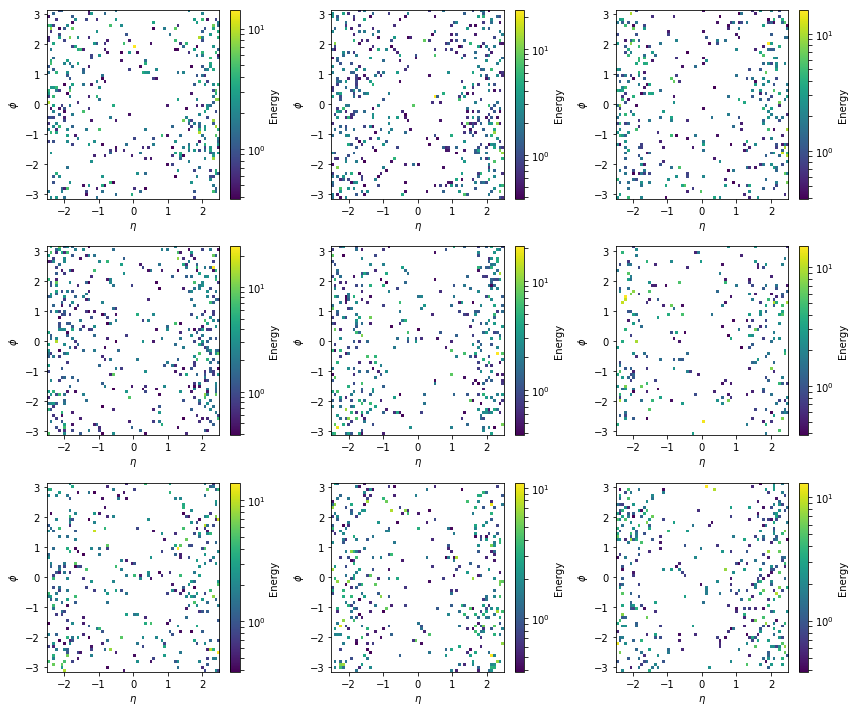

In [5]:
#Populate a list with 9 events from a chosen part of the data set (chosen via sample_seed)
sample_seed = 2
sample_events = []
for i in range(sample_seed, sample_seed+9):
    sample_events.append(data[i])

#Plot the events stored in sample_events using draw_image
fig, axs = plt.subplots(3,3, figsize=(12,10))
for i,ax in enumerate(axs.flatten()):
    draw_image(sample_events[i], ax=ax)
plt.tight_layout()

### Plot the properties of the jets

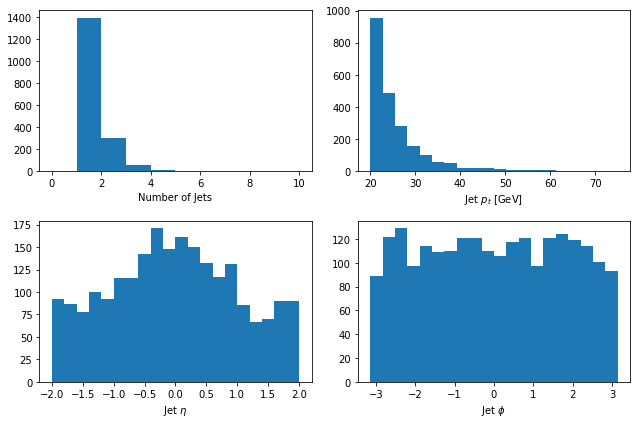

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(9,6))

#number of jets
jetCount = jets.groupby('event').size()
ax1.hist(jetCount, bins=10, range=(0,10))
ax1.set_xlabel('Number of Jets')

#jet pt
ax2.hist(jets.pt, bins=20, range=(20,75))
ax2.set_xlabel('Jet $p_t$ [GeV]')

#jet eta
ax3.hist(jets.eta, bins= 20, range=(-2,2))
ax3.set_xlabel('Jet $\eta$')

#jet phi
ax4.hist(jets.phi, bins= 20, range= (-np.pi, np.pi))
ax4.set_xlabel('Jet $\phi$')

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

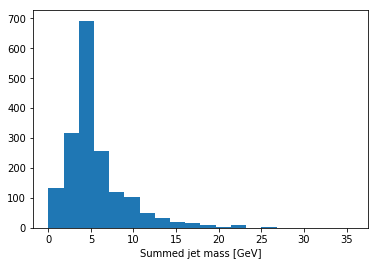

<Figure size 432x288 with 0 Axes>

In [7]:
# Sum of jet mass
sumMass = jets.groupby('event').apply(lambda x: x.m.sum())
plt.hist(sumMass, bins=20)
plt.xlabel('Summed jet mass [GeV]');

plt.figure()

## Let's start training the model

In [8]:
Model = gan.GAN(data_full)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 2,229,249
Trainable params: 2,229,249
Non-trainable para

In [11]:
Model.train(epochs = 10)

0 [D loss: 0.014105, acc.: 100.00%] [G loss: 4.211617]
1 [D loss: 0.017298, acc.: 100.00%] [G loss: 4.156101]
2 [D loss: 0.016199, acc.: 100.00%] [G loss: 4.141517]
3 [D loss: 0.012622, acc.: 100.00%] [G loss: 4.154805]
4 [D loss: 0.016208, acc.: 100.00%] [G loss: 4.156051]
5 [D loss: 0.014361, acc.: 100.00%] [G loss: 4.052009]
6 [D loss: 0.014288, acc.: 100.00%] [G loss: 4.091942]
7 [D loss: 0.016934, acc.: 100.00%] [G loss: 4.093656]
8 [D loss: 0.014825, acc.: 100.00%] [G loss: 4.128859]
9 [D loss: 0.015623, acc.: 100.00%] [G loss: 4.131911]


IOError: [Errno 2] No such file or directory: 'images/9.png'

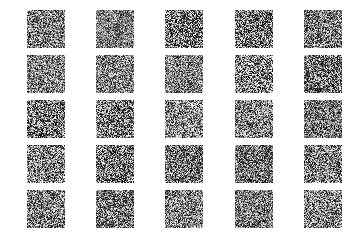

In [12]:
Model.sample_images(9)